In [68]:
# import sys
# !{sys.executable} -m pip install pmdarima

In [69]:
# pip list

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm # 오토아리마

In [71]:
# AirPassengers data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
ap = pd.read_csv(url)
ap.drop('Month', axis = 1, inplace = True)
print(ap.head())

   Passengers
0         112
1         118
2         132
3         129
4         121


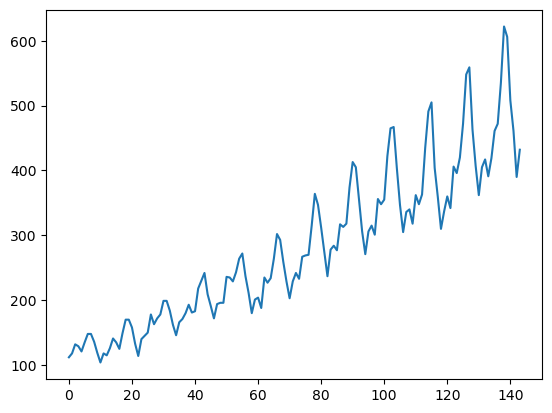

In [72]:
plt.plot(ap)
plt.show()

### 로그 변환을 통해 분산을 일정하게 조절

In [73]:
ap_tf = np.log(ap)

In [74]:
ap_tf

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


acf와 pacf로 그래프를 그리면,  
몇 시점 전까지의 값이 현재 값에 영향을 주는지 시각적으로 파악할 수 있다.

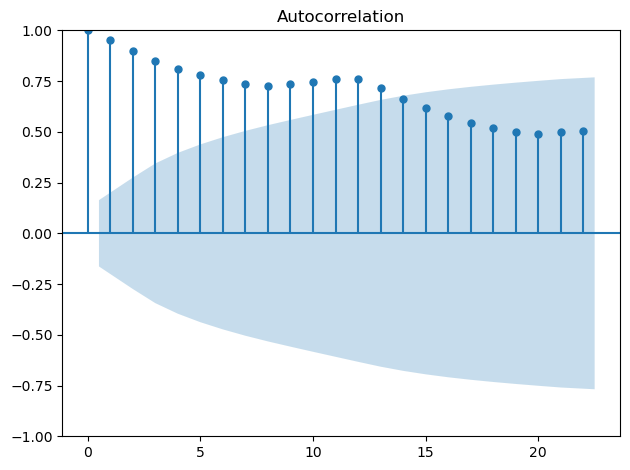

In [75]:
plot_acf(ap_tf) # acf_plot 
plt.tight_layout()

ACF/PACF 그래프에서 지속적인 높은 자기상관이 보이면 비정상성 시계열일 가능성이 높다.

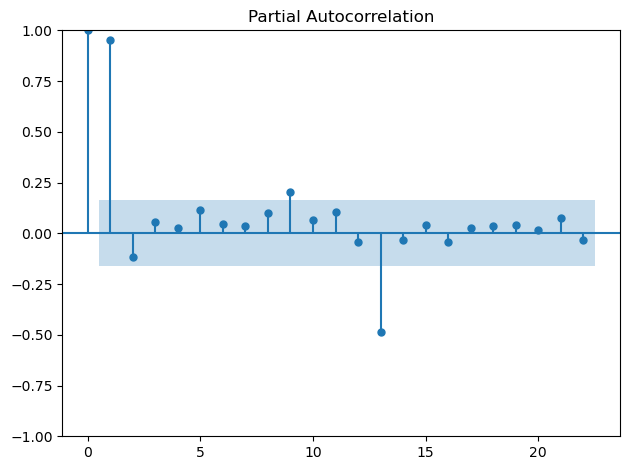

In [76]:
plot_pacf(ap_tf)
plt.tight_layout()

acf_plot: 점점 감소하는 경향  
pacf_plot: lag 2까지 유의미한 결과를 보임

### 차분을 통해 추세 제거

In [77]:
ap_diff = ap_tf.diff()
ap_diff = ap_diff.dropna()

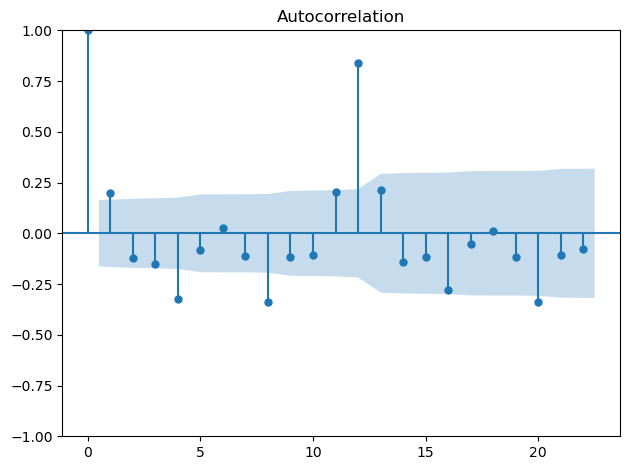

In [78]:
plot_acf(ap_diff)
plt.tight_layout()

lag 1 과 lag 12 에서 유의미한 lag 가 포착됨

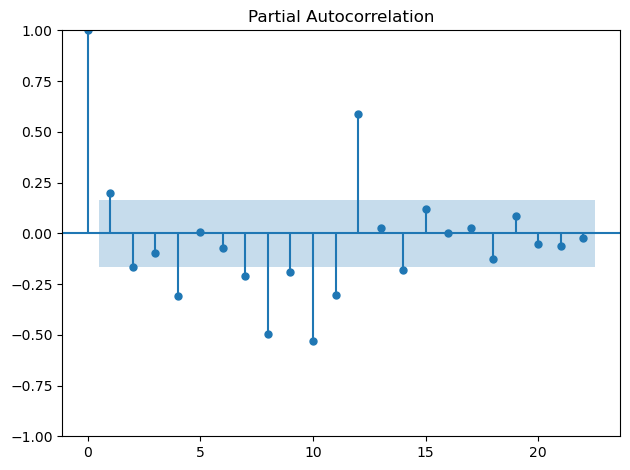

In [79]:
plot_pacf(ap_diff)
plt.tight_layout()

lag 1 과 lag 8~12 에서 유의미한 lag 가 포착됨

acf와 pacf에서 n=12쯤 유의미한 상관관계가 나타남.  
이는 계절성 성분으로 생각하고,  
auto-arima를 적합할 때 계절성을 고려하도록 해야 함.

### ARIMA를 적합할 때 계절성 요인도 고려

In [80]:
ap_tf

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


### 데이터셋 분리 (train, test)

In [81]:
train_size = int(len(ap_tf)*0.8)
train_size

115

In [102]:
ap_tf_train = ap_tf[:train_size]
ap_tf_test = ap_tf[train_size:]

### auto-arima 로 모델 적합

In [104]:
# seasonal=True로 체크
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_d = 12, D=12)
res = model.fit(ap_tf_train)
res

C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.739, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.581, Time=0.32 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-215.679, Time=0.27 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.853, Time=0.43 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.18 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.386, Time=0.43 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.39 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.662, Time=0.67 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=-223.361, Time=0.36 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-217.007, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-197.568, Time=0.19 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-215.500, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-199.544, Time=0.20 sec


C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(5,1,2)(0,0,0)[0]          
Total fit time: 5.659 seconds


AutoARIMA(D=12, max_d=12, trace=True)

Best model:  ARIMA(5,1,2)(0,0,0)[0]

### ARIMA(5,1,2) 모델이 가장 적합하다고 나옴

In [105]:
preds, conf_int = res.predict(n_periods=ap_tf_test.shape[0], return_conf_int=True)
# confidence interval까지 도출

C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\juwonhee\Anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [106]:
print(preds.shape)
print(type(preds))
print('--'*15)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*15)
print(preds)
print('--'*15)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
------------------------------
29
<class 'int'>
------------------------------
115    6.176214
116    6.182071
117    6.099738
118    6.030763
119    6.097969
120    6.113729
121    6.094691
122    6.148871
123    6.123316
124    6.072517
125    6.120769
126    6.111686
127    6.078911
128    6.132751
129    6.120188
130    6.079614
131    6.126978
132    6.115426
133    6.078761
134    6.127931
135    6.117933
136    6.080627
137    6.126992
138    6.116946
139    6.080379
140    6.126230
141    6.117400
142    6.081388
143    6.125788
dtype: float64
------------------------------
[[6.01243868 6.33998944]
 [5.90255119 6.46159106]
 [5.73063885 6.4688366 ]
 [5.61449045 6.44703646]
 [5.66114948 6.53478839]
 [5.66022354 6.56723491]
 [5.61889959 6.57048264]
 [5.64765755 6.650085  ]
 [5.5919308  6.65470169]
 [5.51166679 6.63336702]
 [5.53812709 6.70341138]
 [5.50890599 6.71446692]
 [5.45561332 6.702209  ]
 [5.49118889 6.77431213]
 [5.45860288 6.7817

In [107]:
print(ap_tf_train.shape[0])
print(preds.shape[0])

115
29


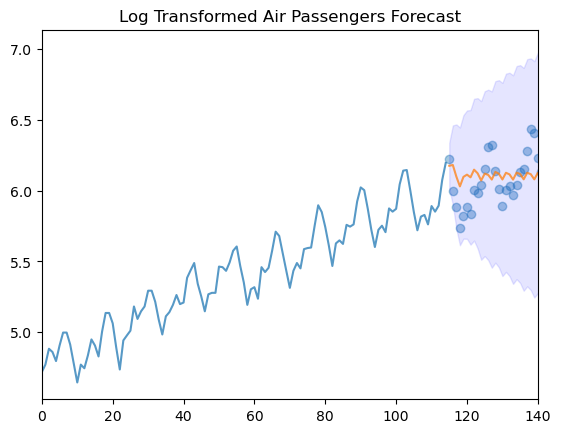

In [108]:
x_axis = np.arange(ap_tf_train.shape[0] + preds.shape[0])
plt.plot(x_axis[:ap_tf_train.shape[0]],ap_tf_train, alpha=0.75)
plt.plot(x_axis[ap_tf_train.shape[0]:], preds, alpha=0.75)
plt.scatter(x_axis[ap_tf_train.shape[0]:],ap_tf_test,
            alpha=0.4, marker='o')  # 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") 
plt.xlim(0,140)  # x축 범위를 0에서 140으로 제한
plt.show() 

## ARCH

In [87]:
import sys
!{sys.executable} -m pip install arch

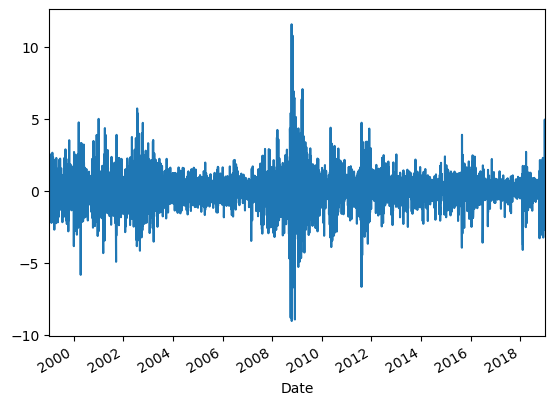

In [88]:
import datetime as dt
import arch.data.sp500

st = dt.datetime(2002,1,1) # start date
en = dt.datetime(2022,1,1) # end date
data = arch.data.sp500.load() 
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max())
plt.show()

Conditional Heteroskedasticity가 나타남

### ARCH 적합

In [89]:
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:         

volatility model을 보면,  
alpha[1], Beta[1] 은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 99%에서 이들이 유의미함을 도출

## 시각화

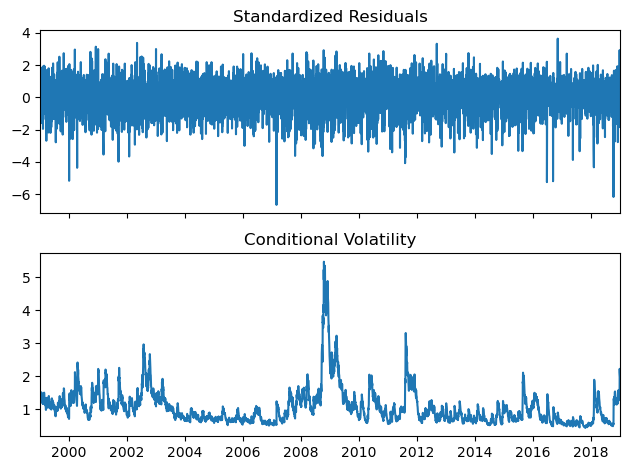

In [90]:
res.plot()
plt.tight_layout()

모델 적합 후 남은 잔차(Residual)와 포착한 조건부 변동성(conditional volatility)을 시각적으로 확인